# Principle Component Analysis
In this notebook we will not try to remove data from our dataset, but transform the variation in our features (columns) into less features.  
We will do this using the concept of PCA (principle component analysis).
The dataset we will be using here is about the dimensions of iris flowers, in total 150 flowers were measured of 3 species.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
iris = sns.load_dataset('iris')

you can see that we imported a function PCA from sklearn, this will do the calculations for us, but we still need to specify some parameters.  
Before we do that, let us use the first 2 columns of the dataset to plot a scatter and see if we can distinguish the different species of flowers.

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

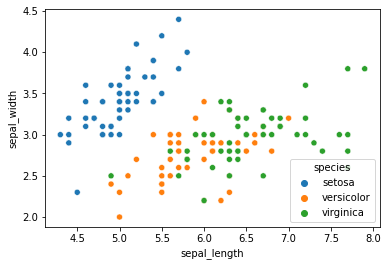

In [3]:
sns.scatterplot(x=iris['sepal_length'], y=iris['sepal_width'], hue=iris['species'])

That already looks pretty good, but versicolor and virginica are still hard to differentiate. Let's see if we can compress the variation of all 4 columns into 2 axi.  
We do this by creating a PCA transformer and specifying we want only 2 output components

In [4]:
pca = PCA(n_components=2)

We also need to prepare our dataframe, we do this by only dropping our outcome (that which we do not need for the transform)

In [5]:
X = iris.drop(columns='species')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_pca = pca.fit_transform(X)
pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


Running it through the PCA transformer using the fit_transform function gives us a numpy 2 dimensional array (which is similar to a pandas dataframe) with 2 columns.  
When inserted into a scatter plot they show us (nearly) all variance of 4 columns compressed into a 2 dimensional plot. 

<AxesSubplot:>

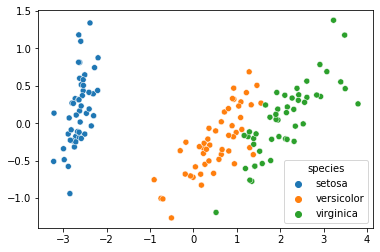

In [7]:
sns.scatterplot(x=iris_pca[:,0], y=iris_pca[:,1], hue=iris['species'])

## TODO
it is clear that this function is very potent concerning data visualisation, do you think you can improve on the mpg dataset?
- experiment with the PCA transformer using the mpg dataset

In [8]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
